# INFO 6105 Final Projrct
                                   
## Shaofan Wei     
## 002815198

This project includes two datasets created using red and white wine samples. Inputs include objective test data (such as pH) and outputs are based on sensory data each of which rates the quality of the wine on a scale of 0 to 10. With these datasets, we can address these questions:
1. Which physical and chemical properties characterize high quality red and white wines.
2. Is there a difference in rating standards between red wine and white wine?

This dataset is sourced from https://archive.ics.uci.edu/dataset/186/wine+quality.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


red_wine = pd.read_csv('C:/Users/Arthur/Desktop/wine+quality/winequality-red.csv', delimiter=';')

white_wine = pd.read_csv('C:/Users/Arthur/Desktop/wine+quality/winequality-white.csv', delimiter=';')

print(red_wine.head())
print(white_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Successfully read and present some data

In [23]:
red_wine_info = red_wine.describe()
red_wine_missing = red_wine.isnull().sum()



red_wine_info, red_wine_missing

(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1599.000000          1599.000000           1599.000000  1599.000000   
 mean      0.087467            15.874922             46.467792     0.996747   
 std       0.047065            10.460157             32.895324     0.001887   
 min       0.012000             1.

## Red wine dataset
Sample size: 1599
Characteristics: Fixed acidity, volatile acidity, citric acid, residual sugar, chloride, free sulfur dioxide, total sulfur dioxide, density, pH, sulfate, alcohol, quality rating
No missing value
Quality rating range: 3 to 8

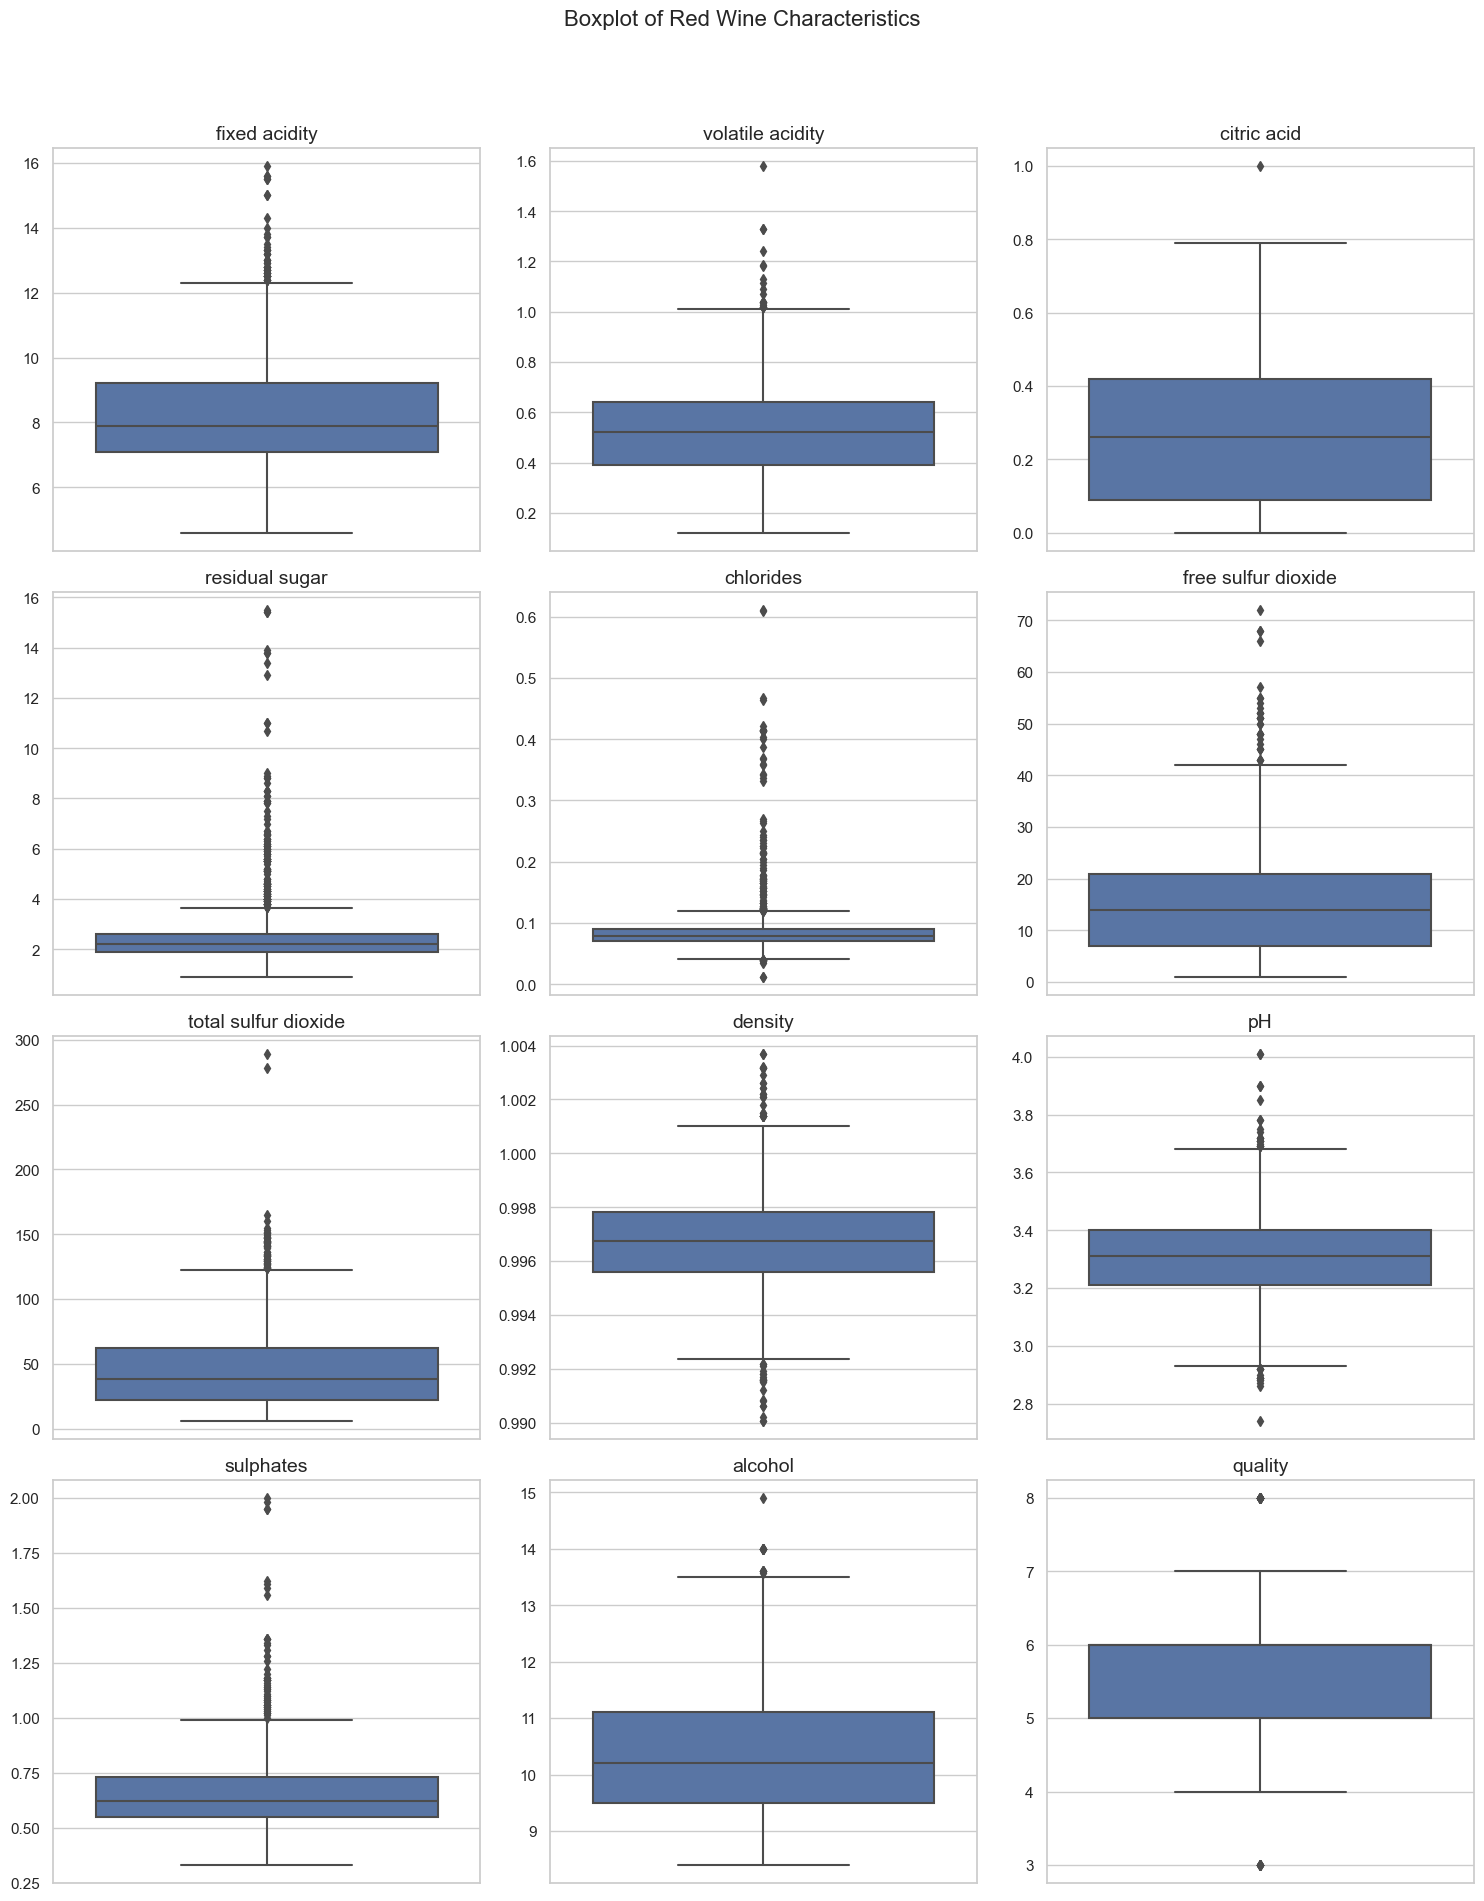

In [24]:
features = red_wine.columns.tolist() 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.suptitle('Boxplot of Red Wine Characteristics', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.boxplot(y=red_wine[features[i]], ax=ax)
        ax.set_title(features[i], fontsize=14)
        ax.set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The box plot shows the distribution of each feature in the red wine dataset, including the median, quartiles, and potential outliers. From the graph, it can be seen that many features such as residual sugar, chlorides, and free sulfur dioxide have some outliers, which may be considered as abnormal values. However, I believe that these are part of natural variation, so I choose to keep them.

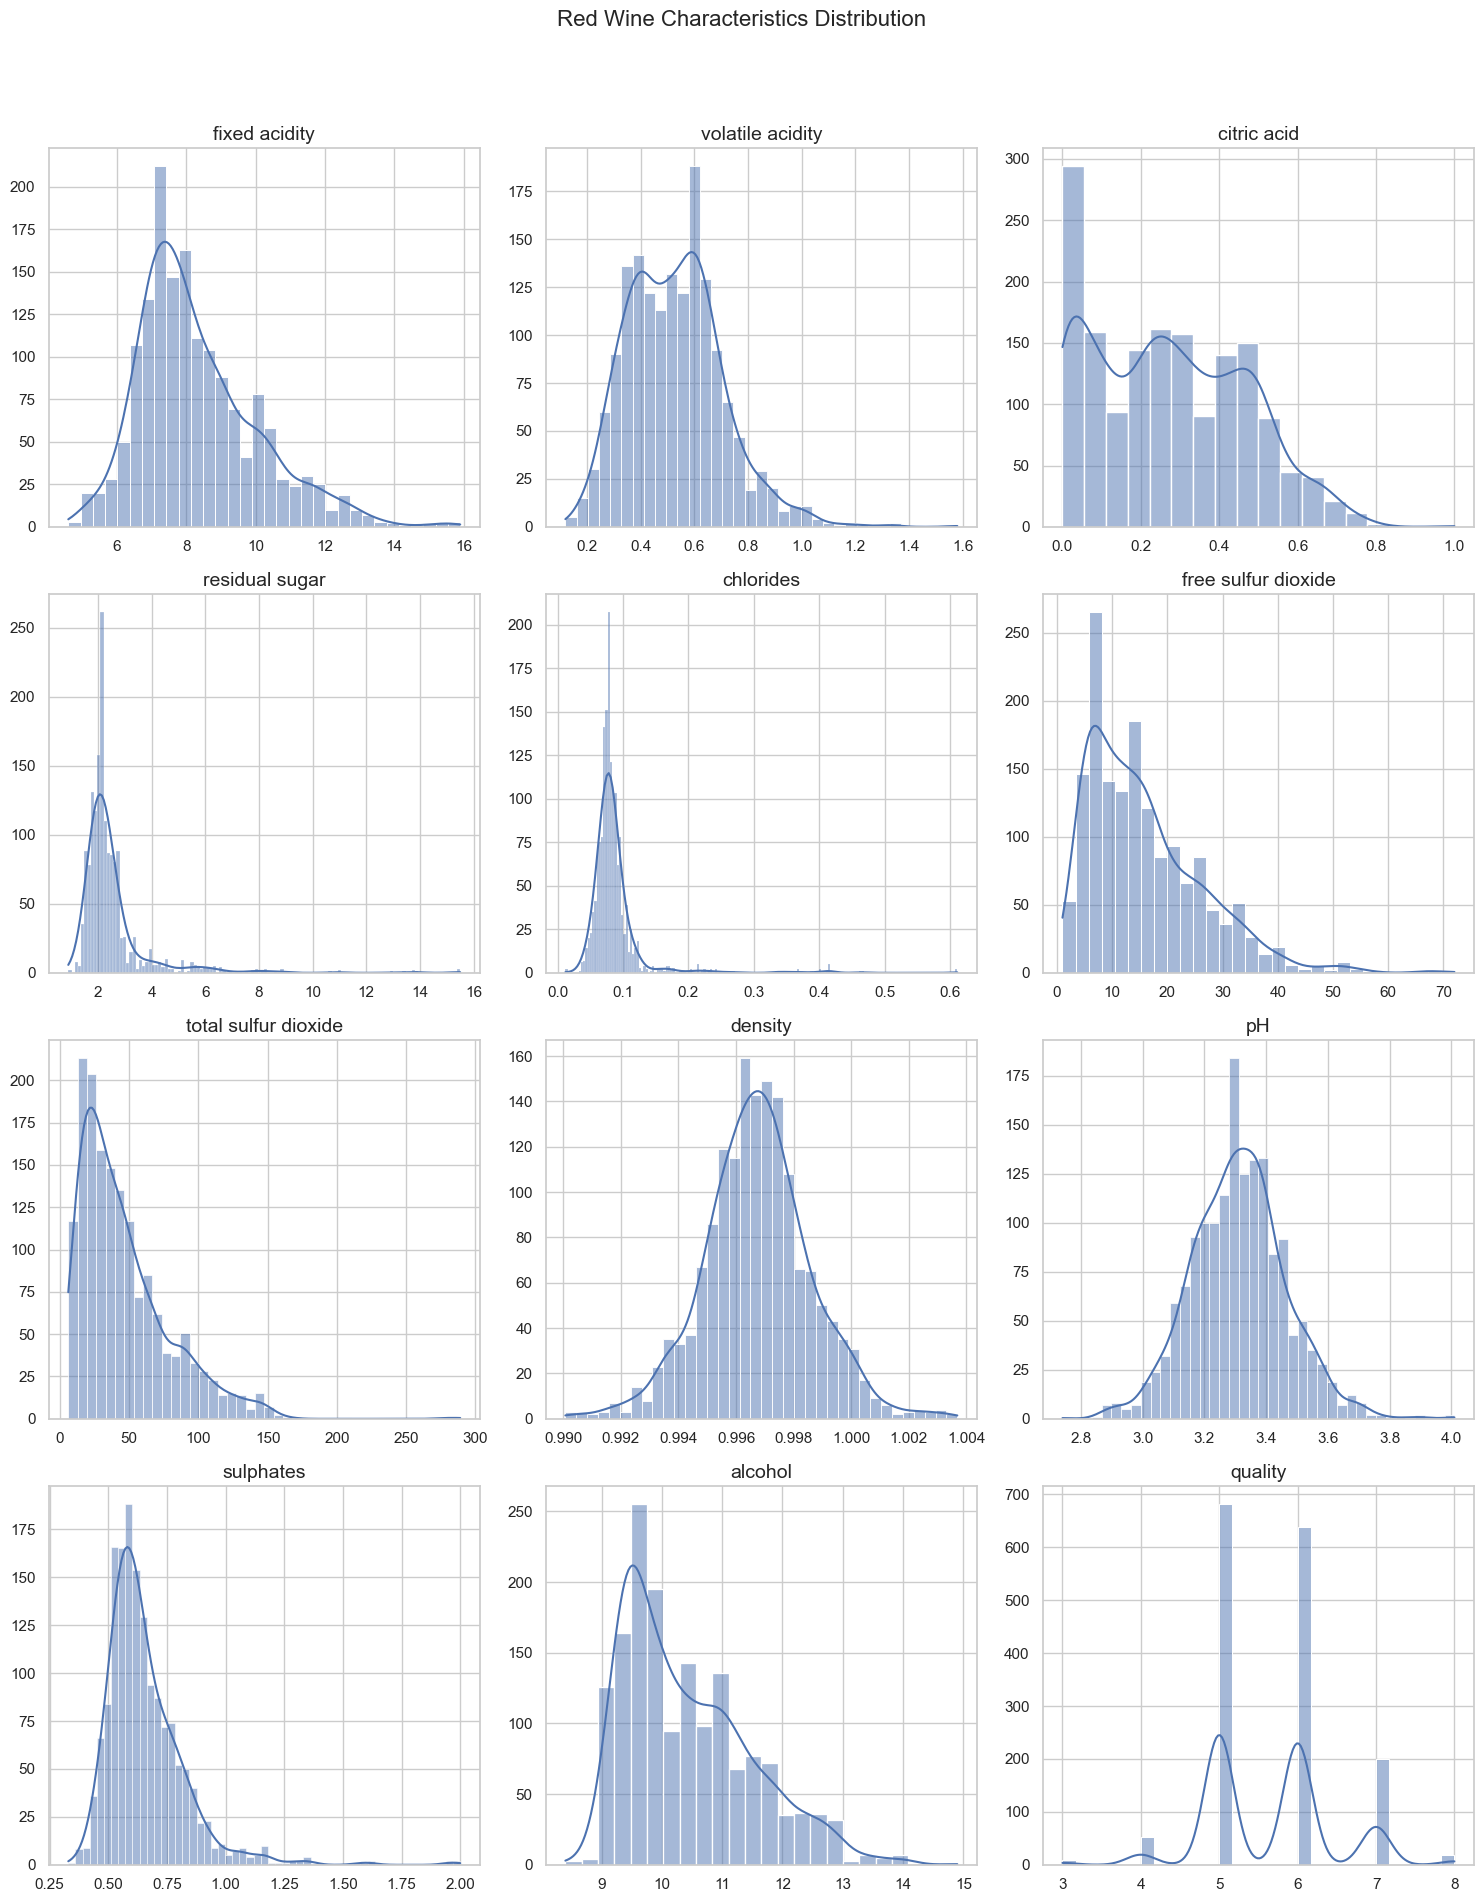

In [25]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.suptitle('Red Wine Characteristics Distribution', fontsize=16)
features = red_wine.columns

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.histplot(red_wine[features[i]], kde=True, ax=ax)
        ax.set_title(features[i], fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This is the histogram of red wine. Next, we can calculate the correlation heat matrix of red wine.

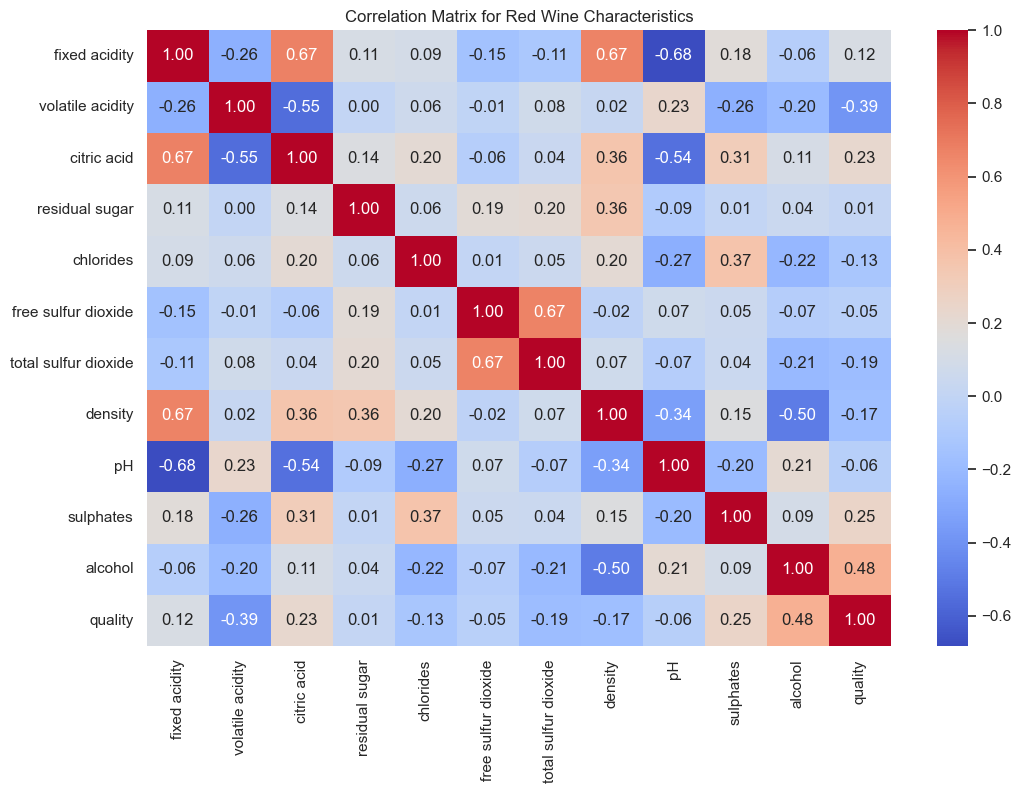

In [26]:
corr_matrix_red = red_wine.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_red, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Red Wine Characteristics')
plt.show()

Apply PCA and plot the explained variance ratio graph.

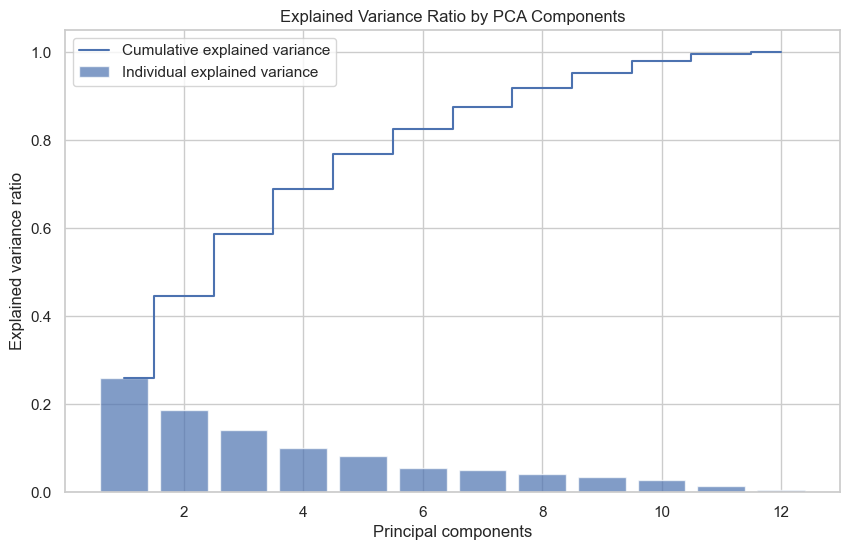

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [27]:
scaler = StandardScaler()

red_wine_scaled = scaler.fit_transform(red_wine)
pca_full = PCA()
red_wine_pca_full = pca_full.fit_transform(red_wine_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by PCA Components')
plt.legend(loc='best')
plt.show()

explained_variance_ratio

This graph shows the explained variance ratio of each principal component, as well as the cumulative explained variance ratio. From the graph, it can be seen that the first four principal components explain nearly 71% of the variance. Next, we will use these principal components for correlation analysis.

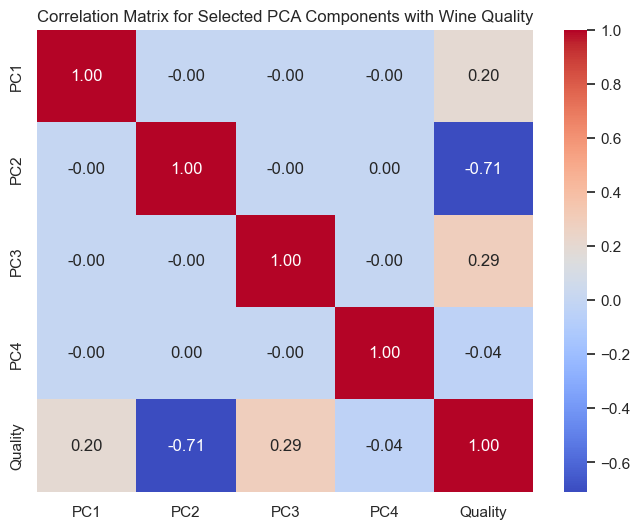

,PC1,PC2,PC3,PC4,Quality
PC1,1.000000e+00,-1.771743e-16,-3.535885e-16,-5.396271e-17,0.198732
PC2,-1.771743e-16,1.000000e+00,-3.011217e-16,1.751548e-16,-0.708468
PC3,-3.535885e-16,-3.011217e-16,1.000000e+00,-6.695314e-16,0.289771
PC4,-5.396271e-17,1.751548e-16,-6.695314e-16,1.000000e+00,-0.040420
Quality,1.987320e-01,-7.084678e-01,2.897712e-01,-4.041975e-02,1.000000


In [28]:
pca_selected = PCA(n_components=4)
red_wine_pca_selected = pca_selected.fit_transform(red_wine_scaled)

red_wine_pca_selected_df = pd.DataFrame(data=red_wine_pca_selected, columns=['PC1', 'PC2', 'PC3', 'PC4'])
red_wine_pca_selected_df['Quality'] = red_wine['quality'] 

corr_matrix_selected_pca = red_wine_pca_selected_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_selected_pca, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected PCA Components with Wine Quality')
plt.show()

corr_matrix_selected_pca

From the correlation heatmap, we can see the correlation between the selected principal components and the wine quality ratings:
PC3 shows the strongest positive correlation with the quality ratings.
PC2 shows a relatively strong negative correlation.
PC1 and PC4 have weaker correlations with the quality ratings.

In [29]:
pca_selected = PCA(n_components=4)
red_wine_scaled = scaler.fit_transform(red_wine.drop('quality', axis=1))
red_wine_pca_selected = pca_selected.fit_transform(red_wine_scaled)

pca_loadings = pd.DataFrame(pca_selected.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=red_wine.drop('quality', axis=1).columns)

pca_loadings

,PC1,PC2,PC3,PC4
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617
volatile acidity,-0.238584,0.274930,-0.449963,0.078960
citric acid,0.463632,-0.151791,0.238247,-0.079418
residual sugar,0.146107,0.272080,0.101283,-0.372793
chlorides,0.212247,0.148052,-0.092614,0.666195
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577
density,0.395353,0.233575,-0.338871,-0.174500
pH,-0.438520,0.006711,0.057697,-0.003788
sulphates,0.242921,-0.037554,0.279786,0.550872


PC1 is mainly positively correlated with fixed acidity, citric acid, density, and pH, and negatively correlated with volatile acidity.
PC2 is strongly positively correlated with free sulfur dioxide and total sulfur dioxide, and strongly negatively correlated with alcohol.
PC3 is negatively correlated with volatile acidity, and positively correlated with alcohol, citric acid, and sulfates.
PC4 has significant positive weights on chlorides and sulfates, and significant negative weight on residual sugar.

Combining this information with previous correlation analysis, we can conclude that characteristics such as volatile acidity, alcohol content, citric acid, sulfates, free sulfur dioxide, and total sulfur dioxide may have a significant impact on the quality rating of red wine.

In [30]:
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']

scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)

pca_red_selected = PCA(n_components=4)
X_red_pca_selected = pca_red_selected.fit_transform(X_red_scaled)

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_pca_selected, y_red, test_size=0.2, random_state=42)

regressor_red = LinearRegression()
regressor_red.fit(X_red_train, y_red_train)

y_red_pred = regressor_red.predict(X_red_test)

mse_red = mean_squared_error(y_red_test, y_red_pred)
r2_red = r2_score(y_red_test, y_red_pred)

print(f'Mean Squared Error (MSE): {mse_red}')
print(f'R-squared Score (R2): {r2_red}')

Mean Squared Error (MSE): 0.4117425215624496
R-squared Score (R2): 0.36994823281885814


MSE of 0.411 indicates that the model has a small difference between predicted and actual values. However, a low R² suggests that the model's fitting ability is relatively poor and may need improvement.

In [31]:
white_wine_info = white_wine.describe()
white_wine_missing = white_wine.isnull().sum()

white_wine_info, white_wine_missing

(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    4898.000000       4898.000000  4898.000000     4898.000000   
 mean        6.854788          0.278241     0.334192        6.391415   
 std         0.843868          0.100795     0.121020        5.072058   
 min         3.800000          0.080000     0.000000        0.600000   
 25%         6.300000          0.210000     0.270000        1.700000   
 50%         6.800000          0.260000     0.320000        5.200000   
 75%         7.300000          0.320000     0.390000        9.900000   
 max        14.200000          1.100000     1.660000       65.800000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  4898.000000          4898.000000           4898.000000  4898.000000   
 mean      0.045772            35.308085            138.360657     0.994027   
 std       0.021848            17.007137             42.498065     0.002991   
 min       0.009000             2.

## White wine dataset
Sample size: 4898
Characteristics: Same as red wine
No missing value
Quality rating range: 3 to 9

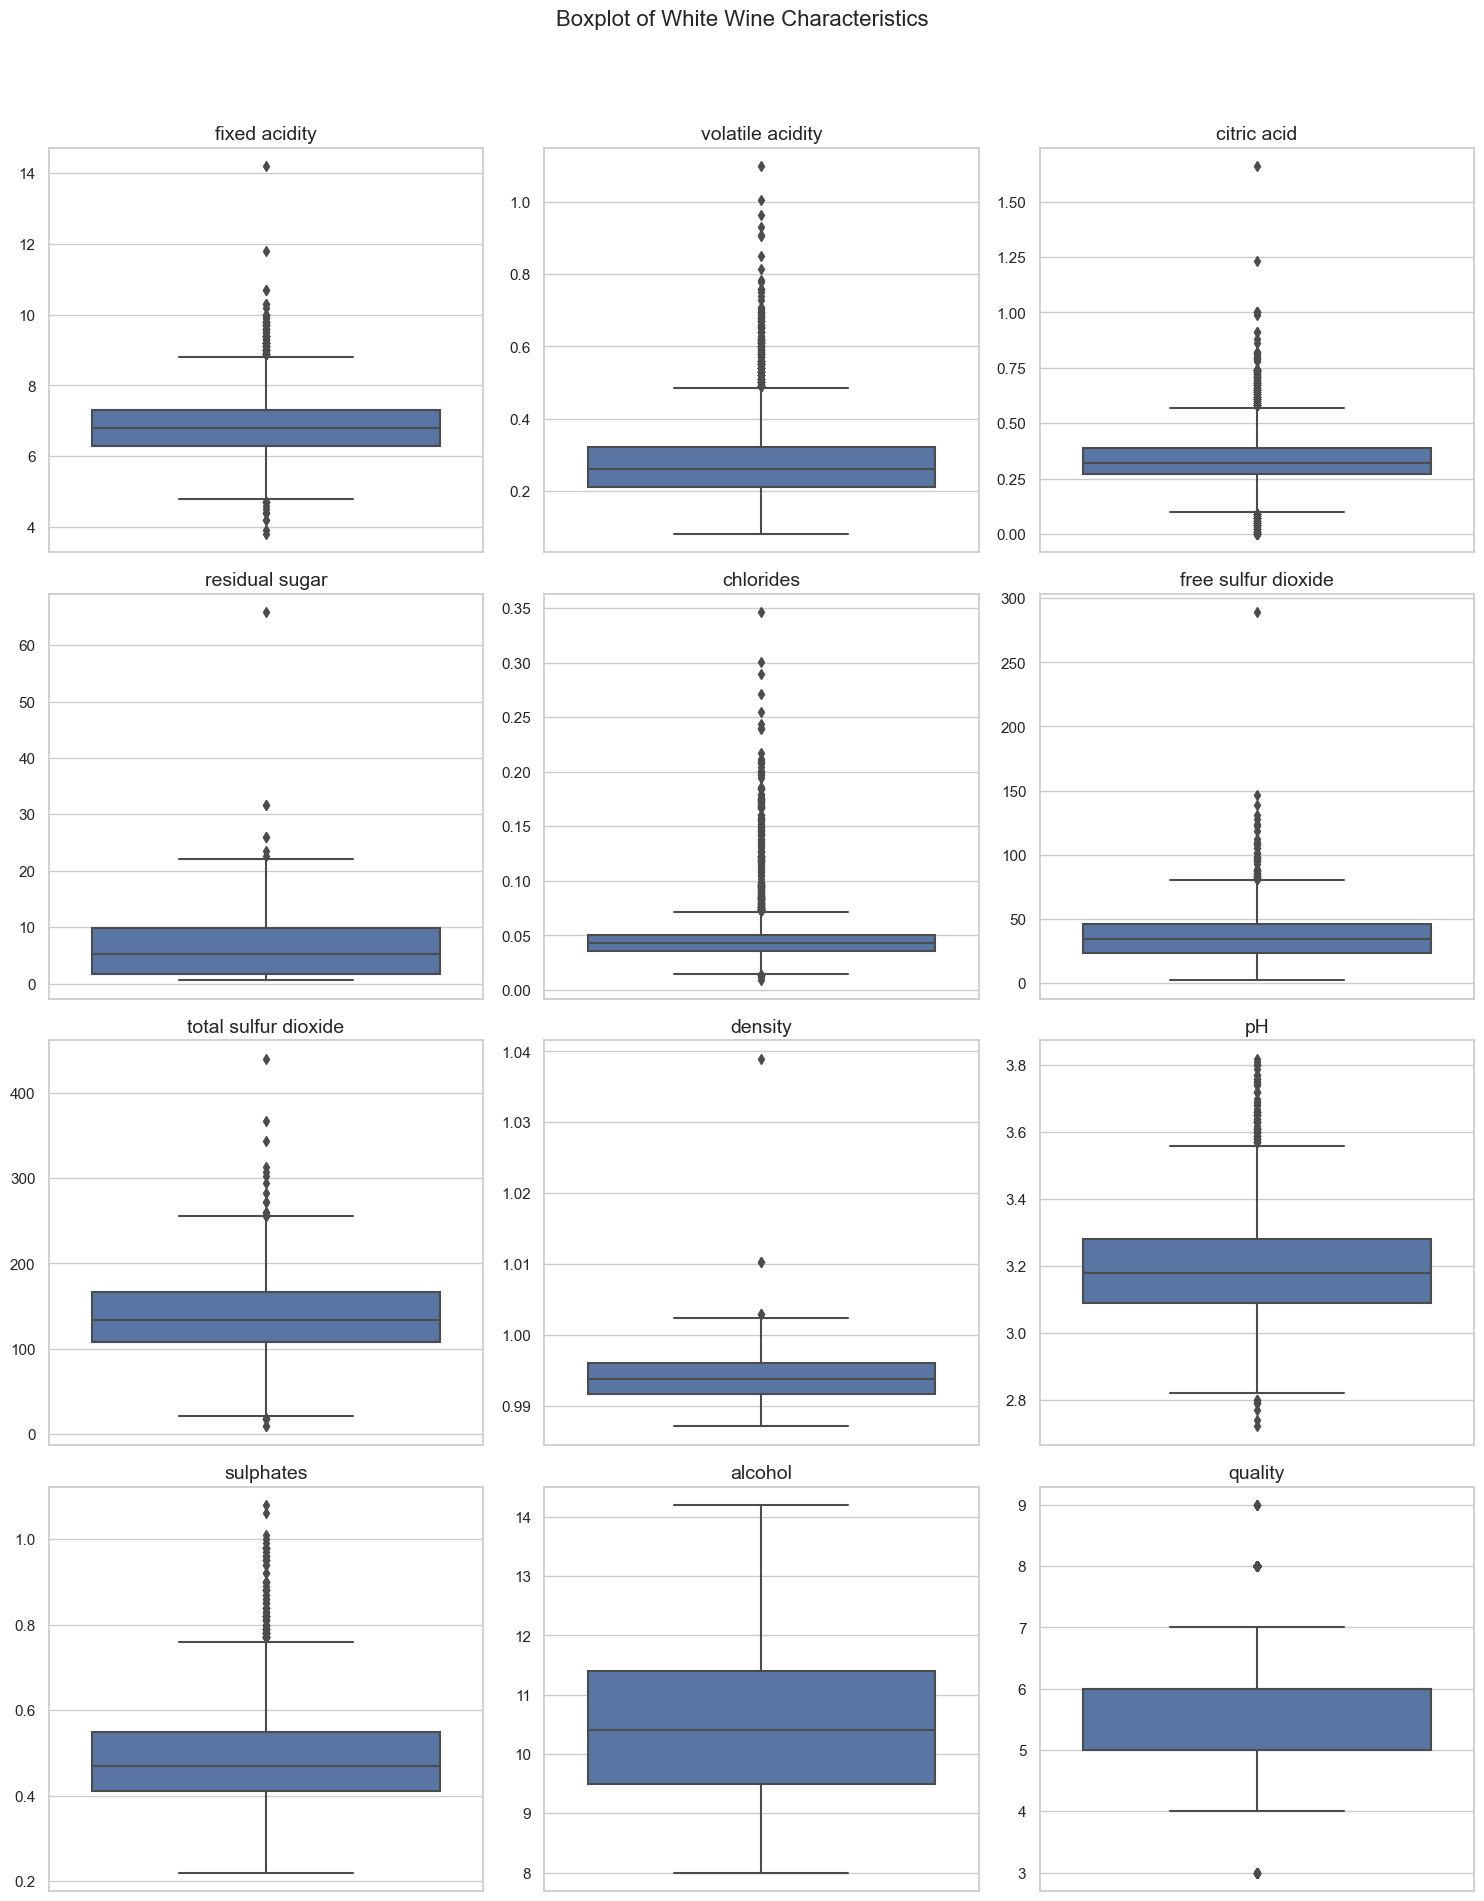

In [32]:
features = white_wine.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.suptitle('Boxplot of White Wine Characteristics', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.boxplot(y=white_wine[features[i]], ax=ax)
        ax.set_title(features[i], fontsize=14)
        ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

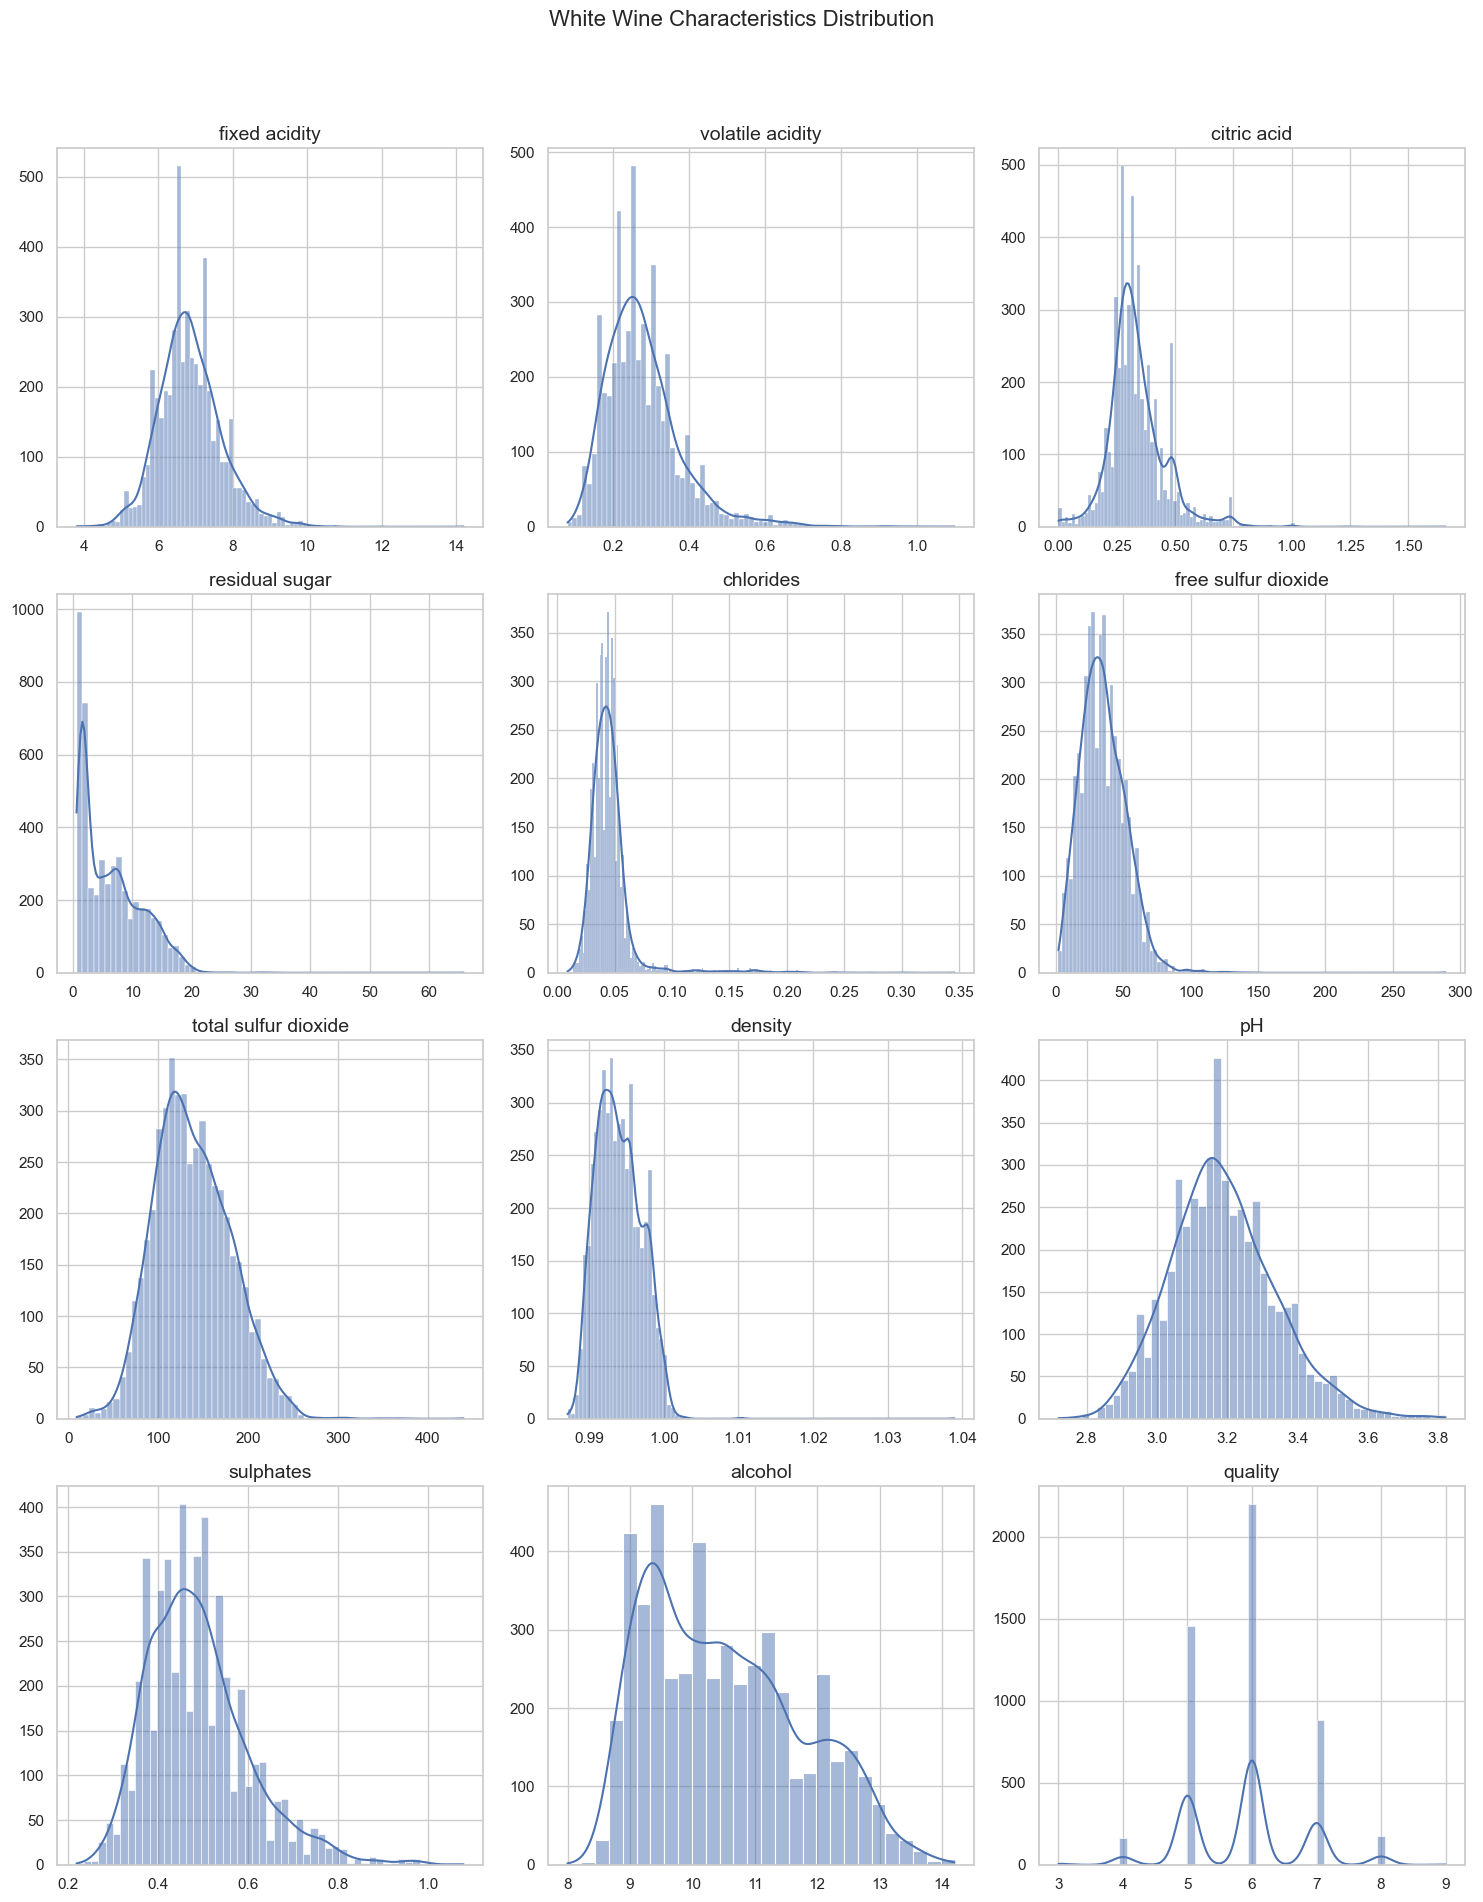

In [33]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.suptitle('White Wine Characteristics Distribution', fontsize=16)

features_white = white_wine.columns

for i, ax in enumerate(axes.flatten()):
    if i < len(features_white) : 
        sns.histplot(white_wine[features_white[i]], kde=True, ax=ax)
        ax.set_title(features_white[i], fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

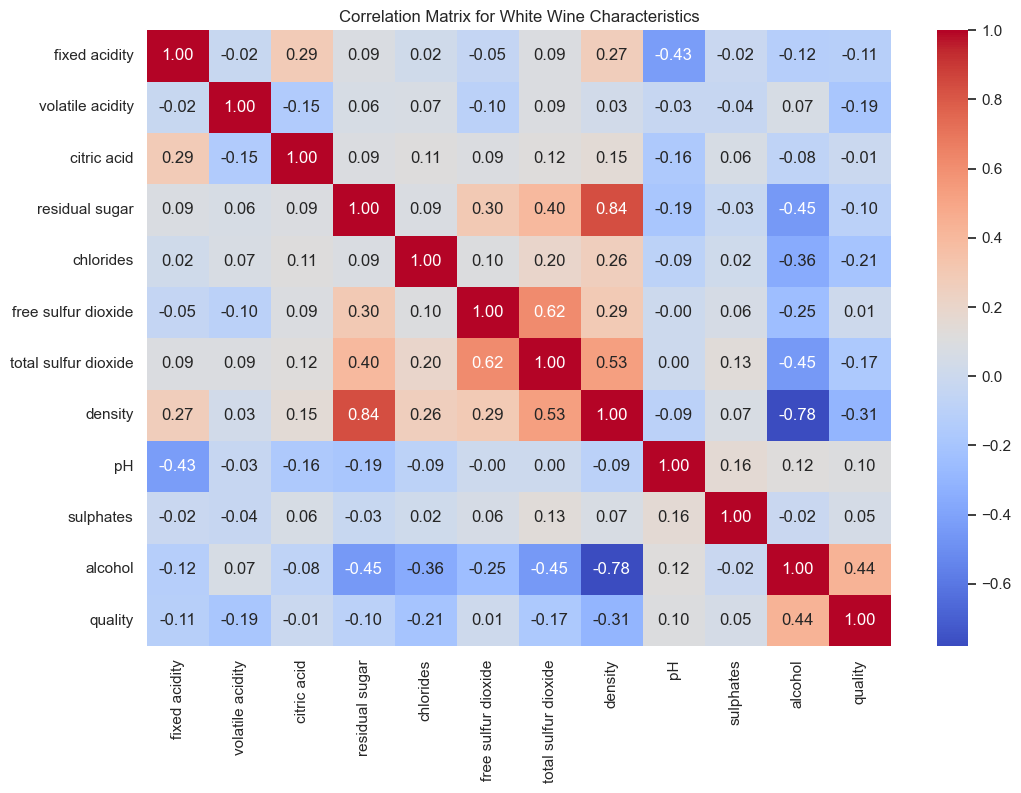

In [34]:
corr_matrix_white_wine = white_wine.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_white_wine, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for White Wine Characteristics')
plt.show()

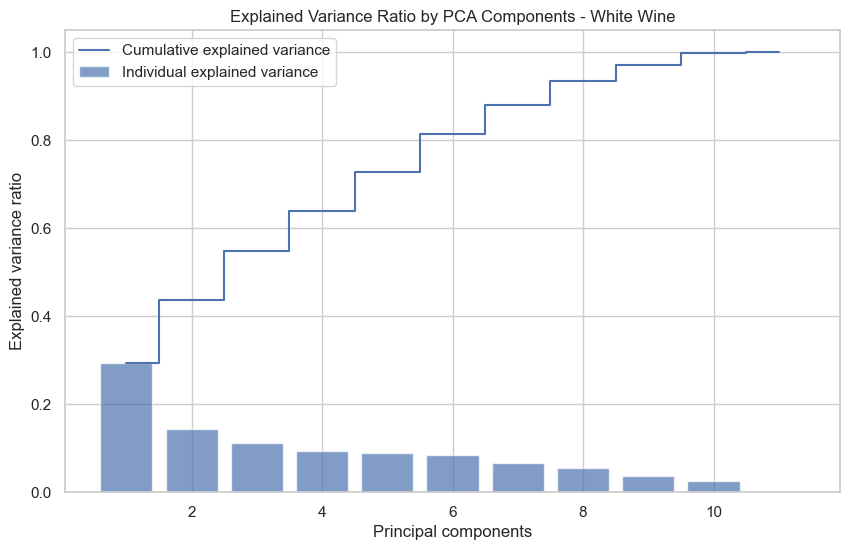

In [35]:
X = white_wine.drop('quality', axis=1) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_white_full = PCA()
X_pca_full = pca_white_full.fit_transform(X_scaled)

explained_variance_ratio_white_full = pca_white_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_white_full) + 1), explained_variance_ratio_white_full, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio_white_full) + 1), np.cumsum(explained_variance_ratio_white_full), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by PCA Components - White Wine')
plt.legend(loc='best')
plt.show()

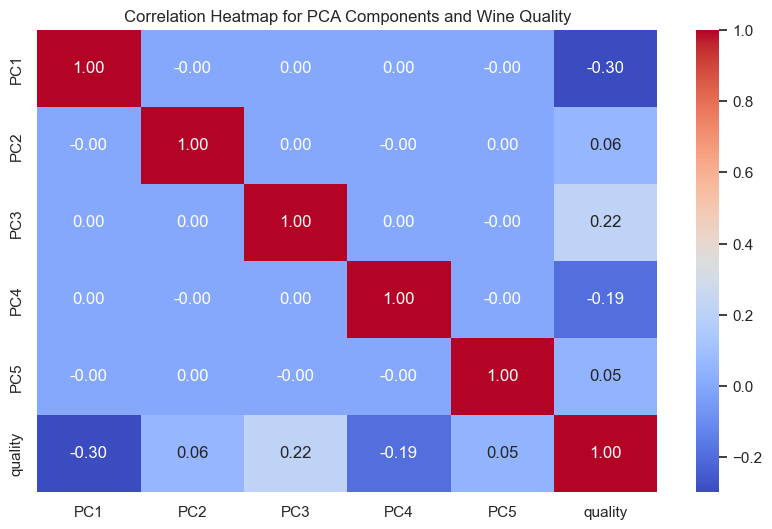

In [17]:

X_white = white_wine.drop('quality', axis=1)

scaler = StandardScaler()

X_white_scaled = scaler.fit_transform(X_white)

pca_white_5 = PCA(n_components=5)
X_white_pca_5 = pca_white_5.fit_transform(X_white_scaled)

pca_components_df = pd.DataFrame(X_white_pca_5, columns=[f'PC{i+1}' for i in range(5)])

combined_df = pd.concat([pca_components_df, white_wine['quality']], axis=1)

correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for PCA Components and Wine Quality')
plt.show()

In [37]:
X_white = white_wine.drop('quality', axis=1)
scaler = StandardScaler()

X_white_scaled = scaler.fit_transform(X_white)
pca_white_selected = PCA(n_components=5)

X_pca_selected = pca_white_selected.fit_transform(X_scaled)

explained_variance_ratio_white_selected = pca_white_selected.explained_variance_ratio_

pca_loadings_white_selected = pd.DataFrame(
    pca_white_selected.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index=X.columns
)

pca_loadings_white_selected

,PC1,PC2,PC3,PC4,PC5
fixed acidity,0.157218,-0.587558,0.121368,0.018584,0.251048
volatile acidity,0.005089,0.051728,-0.590971,0.274115,0.642617
citric acid,0.144050,-0.345295,0.504397,0.148514,0.053905
residual sugar,0.427408,0.008749,-0.214320,-0.273765,0.011391
chlorides,0.212011,-0.008800,-0.102367,0.710712,-0.328628
free sulfur dioxide,0.300334,0.290355,0.279410,-0.305585,0.176912
total sulfur dioxide,0.406652,0.244032,0.124375,-0.060456,0.293010
density,0.511524,0.006297,-0.129203,-0.022061,-0.084588
pH,-0.128832,0.581344,0.126672,0.097753,-0.119826
sulphates,0.043379,0.222695,0.433244,0.442060,0.400585


PC1: Mainly influenced by density, alcohol, residual sugar, and total sulfur dioxide.
PC2: Mainly influenced by fixed acidity, pH, and volatile acidity.
PC3: Mainly influenced by citric acid, volatile acidity, and sulphates.
PC4: Chlorides and sulphates contribute significantly to this component.
PC5: Volatile acidity, sulphates, and total sulfur dioxide have a significant impact on this component.

In conclusion, Alcohol content is usually associated with high-quality wines. Residual Sugar may be related to lower wine quality. Higher levels of Total Sulfur Dioxide may be associated with lower wine quality. Citric Acid may be related to higher wine quality. Lower levels of Volatile Acidity may be associated with higher wine quality. Lower levels of Chlorides may be related to higher wine quality.

In [38]:
X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

scaler = StandardScaler()
X_white_scaled = scaler.fit_transform(X_white)

pca_white = PCA(n_components=5)
X_white_pca = pca_white.fit_transform(X_white_scaled)

X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_pca, y_white, test_size=0.2, random_state=42)

regressor_white = LinearRegression()
regressor_white.fit(X_white_train, y_white_train)

y_white_pred = regressor_white.predict(X_white_test)

mse_white = mean_squared_error(y_white_test, y_white_pred)
r2_white = r2_score(y_white_test, y_white_pred)

print(f'Mean Squared Error (MSE): {mse_white}')
print(f'R-squared Score (R2): {r2_white}')

Mean Squared Error (MSE): 0.6396096657167633
R-squared Score (R2): 0.1741357629773712


MSE of 0.639 indicates that the model has a small difference between predicted and actual values. However, a low R² suggests that the model's fitting ability is relatively poor and may need improvement.

By analyzing, we can find that the evaluation criteria for white wine and red wine are different. Although alcohol content is an important indicator in both, there are differences in the impact of certain specific characteristics on the quality of red and white wines.